In [25]:
import numpy as np
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [17]:
import pandas as pd

In [18]:
Boston = load_boston()
Boston_df = pd.DataFrame(Boston.data, columns= Boston.feature_names)

In [19]:
Boston_df['y_MEDV'] = Boston.target

In [20]:
Boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,y_MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [23]:
X_train, X_test, y_train, y_test = train_test_split(Boston_df[Boston.feature_names], Boston_df['y_MEDV'], test_size=0.30)

In [26]:
#With training data
linreg = LinearRegression().fit(X_train,y_train)

In [47]:
#take absolute value since we only care about magnitude
coef = {'Feature':Boston.feature_names,'Coef Value':np.abs(linreg.coef_)}
pd.DataFrame(coef).sort_values(by = 'Coef Value', ascending = False)

,Coef Value,Feature
4,15.547971,NOX
5,3.685111,RM
3,1.791481,CHAS
7,1.497912,DIS
10,0.981467,PTRATIO
12,0.524785,LSTAT
8,0.297094,RAD
0,0.107865,CRIM
1,0.043065,ZN
9,0.012868,TAX


In [53]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [54]:
Iris = pd.datasets.load_iris()
Wine = datasets.load_wine()

In [58]:
Iris_df = pd.DataFrame(Iris.data,columns = Iris.feature_names)
Wine_df = pd.DataFrame(Wine.data,columns = Wine.feature_names)

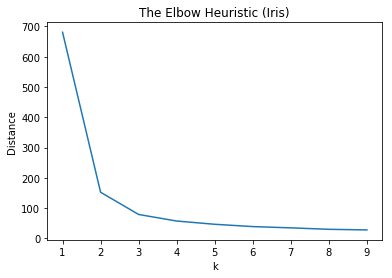

In [68]:
#Using the elbow heuristic we can see that the "elbow" in this case would be 3 clusters.
distance = []
for k in range(1,10):
    kmeanModel = KMeans(n_clusters=k).fit(Iris_df)
    distance.append(kmeanModel.inertia_)
# Plot the elbow
plt.plot(range(1,10), distance)
plt.xlabel('k')
plt.ylabel('Distance')
plt.title('The Elbow Heuristic (Iris)')
plt.show()

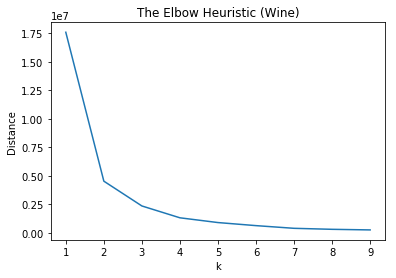

In [69]:
#Using the elbow heuristic we can see that the "elbow" in this case would be 3 clusters.
distance = []
for k in range(1,10):
    kmeanModel = KMeans(n_clusters=k).fit(Wine_df)
    distance.append(kmeanModel.inertia_)
# Plot the elbow
plt.plot(range(1,10), distance)
plt.xlabel('k')
plt.ylabel('Distance')
plt.title('The Elbow Heuristic (Wine)')
plt.show()